<a href="https://colab.research.google.com/github/SuminBae97/PytorchStudy/blob/main/gluonts_mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mxnet

     |████████████████████████████████| 47.3 MB 1.2 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
pip install --upgrade mxnet~=1.7 gluonts

     |████████████████████████████████| 2.8 MB 14.4 MB/s 
     |████████████████████████████████| 10.9 MB 39.9 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.


In [3]:
# pip install d2l
# pip install -U d2l
# pip install -U matplotlib

In [4]:
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json

Datasets

In [5]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas

/usr/local/lib/python3.7/dist-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [6]:
dataset_recipes.keys()

odict_keys(['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'cif_2016', 'london_smart_meters_without_missing', 'wind_farms_without_missing', 'car_parts_without_missing', 'dominick', 'fred_md', 'pedestrian_counts', 'hospital', 'covid_deaths', 'kdd_cup_2018_without_missing', 'weather', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5'])

In [7]:
dataset = get_dataset("hospital",regenerate=True)

Download hospital_dataset.zip:: 80.0kB [00:01, 71.3kB/s]
creating json files: 100%|██████████| 767/767 [00:00<00:00, 3187.03it/s]


In [8]:
dataset

TrainDatasets(metadata=MetaData(freq='M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat_0', cardinality='767')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=12), train=<gluonts.dataset.common.FileDataset object at 0x7fde38fc6310>, test=<gluonts.dataset.common.FileDataset object at 0x7fde38fc6810>)

In [9]:
dataset.train,dataset.test

(<gluonts.dataset.common.FileDataset at 0x7fde38fc6310>,
 <gluonts.dataset.common.FileDataset at 0x7fde38fc6810>)

In [10]:
entry_train = next(iter(dataset.train))
entry_test = next(iter(dataset.test))

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:338: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return timestamp.freq.rollforward(timestamp)


In [11]:
entry_train

{'item_id': 'T1',
 'source': SourceContext(source=PosixPath('/root/.mxnet/gluon-ts/datasets/hospital/train/data.json'), row=0),
 'start': Timestamp('2000-01-31 00:00:00', freq='M'),
 'target': array([27., 16., 18., 19., 21., 20., 20., 23., 26., 21., 17., 24.,  8.,
         1.,  3.,  4.,  7., 13.,  6.,  2., 12.,  8.,  5.,  4., 11.,  8.,
         5.,  2.,  3.,  4.,  5.,  6.,  2.,  3.,  5., 10., 20., 23., 14.,
        20., 23., 17.,  7., 13., 17., 12., 15., 10., 15.,  9., 14., 15.,
        12., 13., 16., 13., 15., 16., 21., 12., 14., 15., 21., 20., 12.,
        14., 11., 15., 20., 11., 11., 19.], dtype=float32)}

In [12]:
train_series=  to_pandas(entry_train)
test_series = to_pandas(entry_test)

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


In [13]:
train_series.shape,test_series.shape

((72,), (84,))

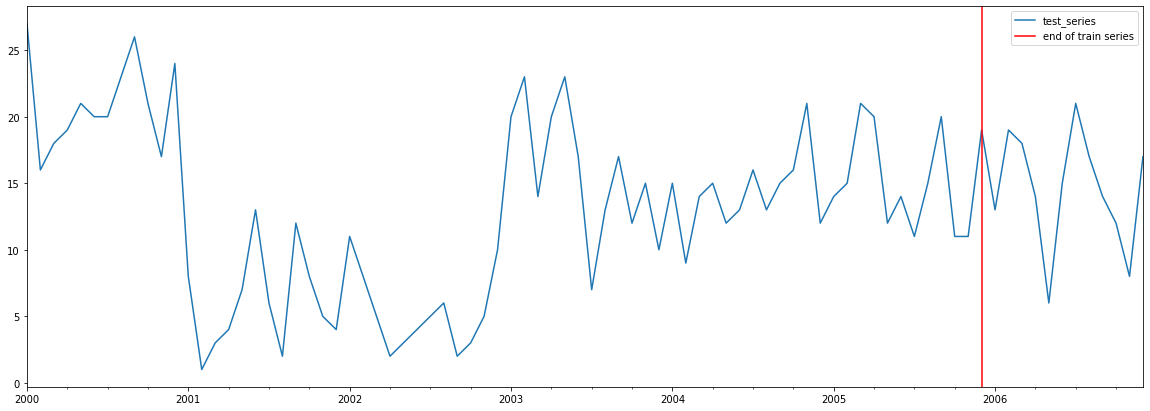

In [14]:
test_series.plot(figsize=(20,7))
plt.axvline(train_series.index[-1],color='r')
plt.legend(['test_series','end of train series'])


In [15]:
train_data = list(dataset.train)
test_data = list(dataset.test)

In [16]:
len(train_data), len(test_data),dataset.metadata.freq , dataset.metadata.prediction_length

(767, 767, 'M', 12)

In [17]:
tr5 = to_pandas(train_data[10])
te5 = to_pandas(test_data[10])


/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


In [18]:
tr5.shape,te5.shape

((72,), (84,))

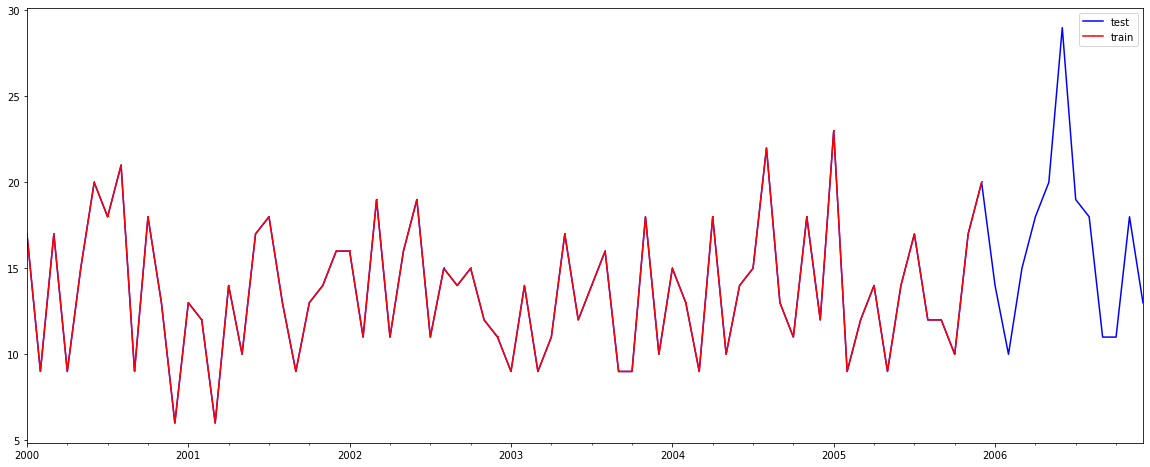

In [20]:
te5.plot(color='blue')
tr5.plot(color='red',figsize=(20,8),marker=',')
plt.legend(['test','train'])


Custom Datset

In [21]:
from gluonts.dataset.common import ListDataset

N = 10  # number of time series
T = 100  # number of timesteps
prediction_length = 24
freq = "1H"
custom_dataset = np.random.normal(size=(N, T))
start = pd.Timestamp("01-01-2019", freq=freq) 

train_ds = ListDataset(
    [{'target': x, 'start': start} for x in custom_dataset[:, :-prediction_length]],
    freq=freq
)
# test dataset: use the whole dataset, add "target" and "start" fields
test_ds = ListDataset(
    [{'target': x, 'start': start} for x in custom_dataset],
    freq=freq
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  


In [22]:
from gluonts.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.mx import Trainer



In [25]:
mlp_estimator = SimpleFeedForwardEstimator(
    num_hidden_dimensions=[256,128,64],
    prediction_length=dataset.metadata.prediction_length,
    context_length=100,
    freq = dataset.metadata.freq,
    trainer=Trainer(
        ctx='cpu',
        epochs=30,
        learning_rate=1e-3,
        num_batches_per_epoch=100
    )
)

mlp_predictor = mlp_estimator.train(dataset.train)

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
100%|██████████| 100/100 [00:00<00:00, 104.67it/s, epoch=30/30, avg_epoch_loss=4.17]


In [27]:
dataset.metadata

MetaData(freq='M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat_0', cardinality='767')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=12)

In [66]:
from gluonts.model.predictor import Predictor
from gluonts.evaluation import make_evaluation_predictions

mlp_forecast,mlp_ts = make_evaluation_predictions(
    dataset=dataset.test,
    predictor = mlp_predictor,
    num_samples=100
)




mlp_ts : true data
mlp_forecast : prediction

In [67]:
mlp_forecast = list(mlp_forecast)
mlp_ts = list(mlp_ts)

/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)


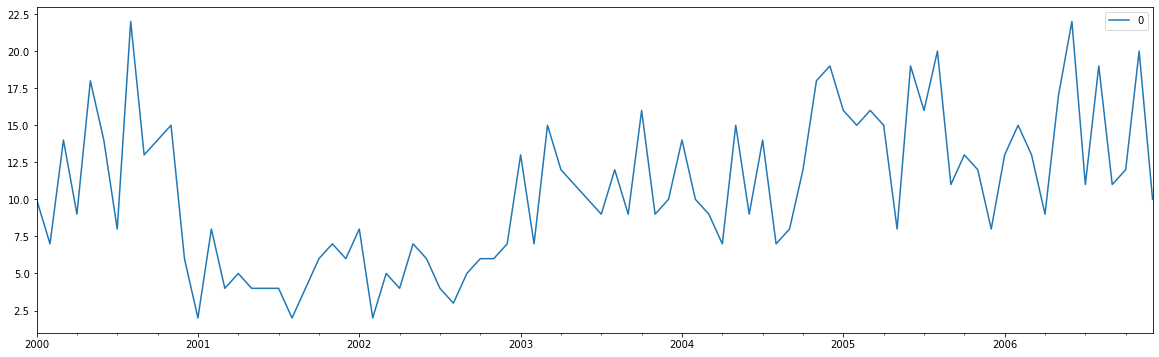

In [68]:
mlp_ts[1].plot(figsize=(20,6))

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


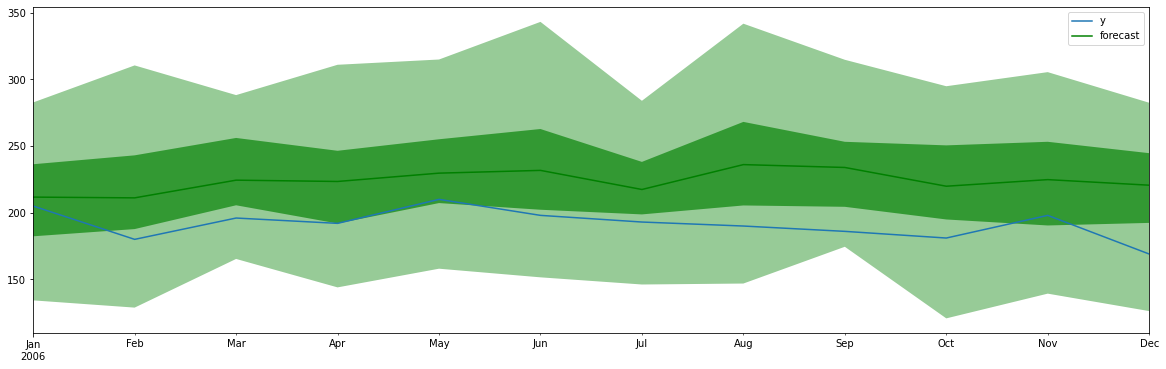

In [72]:
to_pandas(test_data[2])[72:].plot(figsize=(20,6))
mlp_forecast[2].plot(color='green')
plt.legend(['y','forecast'])

In [70]:
print(f"Number of sample paths: {mlp_forecast[0].num_samples}")
print(f"Dimension of samples: {mlp_forecast[0].samples.shape}")
print(f"Start date of the forecast window: {mlp_forecast[0].start_date}")
print(f"Frequency of the time series: {mlp_forecast[0].freq}")

Number of sample paths: 100
Dimension of samples: (100, 12)
Start date of the forecast window: 2006-01-31 00:00:00
Frequency of the time series: M


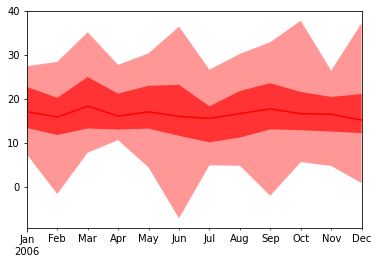